Name : Uday.V.More

Data Science Test for Wednesday Solutions




Instructions for execution :



*   keep the "**train.csv**" and "**test.csv**" files in the same directory
*   If running the Notebook on an local Runtime make sure to create and use an Anaconda env first(prefer Running on Google Colab by uploading all the necessary files).

*   The Final output file(**outputLR.csv**) will be generated at the last cell of the notebook.









### RMS Titanic Survival Prediction


In [1]:
import numpy as np                    
import pandas as pd                   
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Importing Data

In [ ]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv") 

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Visualization






### Number of People Survived and Deceased

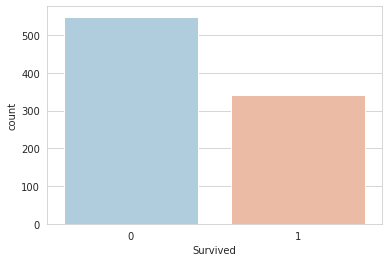

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

### **Number of Male and Females Survived and Deceased**






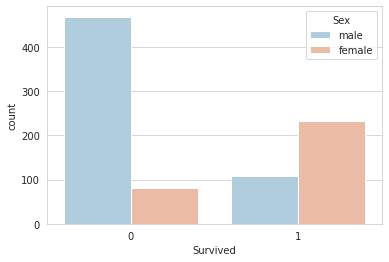

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

### Number of People Survived According to passanger class

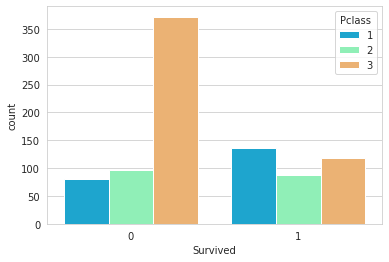

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

### Age Distribution

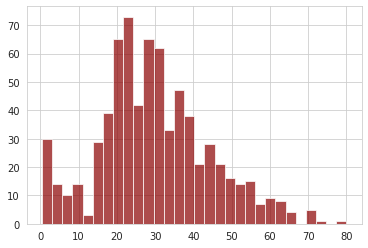

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

### Data Cleaning


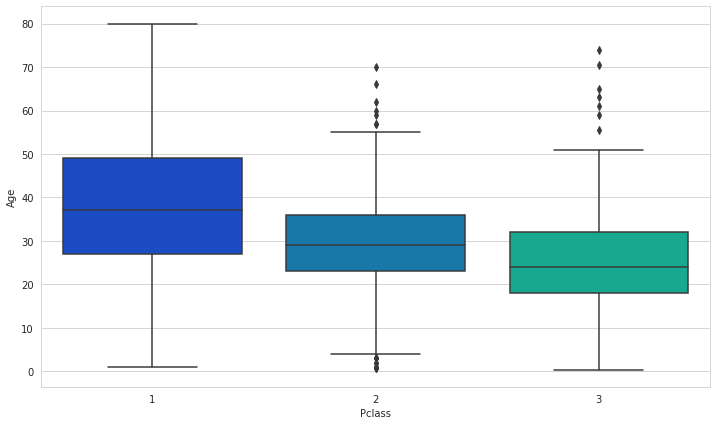

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


Since, the wealthier passengers in the higher classes tend to be older. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Applying impute_age() function

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

In [ ]:
train.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

### Converting Categorical Features 

Encoding Categorical Variables

In [ ]:
#for train data
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
#for test data
test_sex = pd.get_dummies(test_data['Sex'],drop_first=True)
test_embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_data = pd.concat([test_data,test_sex,test_embark],axis=1)

In [ ]:
#fill null value of fare column with 0
test_data.Fare.fillna(0 ,inplace = True)

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Building,Training, Testing and Evaluating the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
id = test_data['PassengerId']
predictions = logmodel.predict(test_data.drop('PassengerId', axis=1))
result = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions })
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
#writing the output in csv 
result.to_csv('outputLR.csv', index = False)